<a href="https://colab.research.google.com/github/deba607/ROC_Curve/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("/content/crime_data - Copy.csv")
print(df)

      Unnamed: 0  state  county  community  fold  population  householdsize  \
0              0      0       0          0     0        0.19           0.33   
1              0     53       0          0     0        0.00           0.16   
2              0     24       0          0     0        0.00           0.42   
3              0     34       0      81440     0        0.04           0.77   
4              0     42      95       6096     0        0.01           0.55   
...          ...    ...     ...        ...   ...         ...            ...   
1989        1989     12       0          0    10        0.01           0.40   
1990        1990      0       0          0    10        0.05           0.96   
1991        1991      0       0      80070    10        0.16           0.37   
1992        1992     25      17      72600    10        0.08           0.51   
1993        1993      0       0          0    10        0.20           0.78   

      racepctblack  racePctWhite  racePctAsian  ...

In [ ]:
# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X= df.drop(columns= 'ViolentCrimesPerPop', axis=1)
y = df['ViolentCrimesPerPop']

In [ ]:
print(X)
print(y)

      Unnamed: 0  state  county  community  fold  population  householdsize  \
0              0      0       0          0     0        0.19           0.33   
1              0     53       0          0     0        0.00           0.16   
2              0     24       0          0     0        0.00           0.42   
3              0     34       0      81440     0        0.04           0.77   
4              0     42      95       6096     0        0.01           0.55   
...          ...    ...     ...        ...   ...         ...            ...   
1989        1989     12       0          0    10        0.01           0.40   
1990        1990      0       0          0    10        0.05           0.96   
1991        1991      0       0      80070    10        0.16           0.37   
1992        1992     25      17      72600    10        0.08           0.51   
1993        1993      0       0          0    10        0.20           0.78   

      racepctblack  racePctWhite  racePctAsian  ...

In [ ]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

In [ ]:
# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

            # Train your model on X_train and y_train
                # ...
                    # Evaluate your model on X_test and y_test
                        # ...

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# this is for random forest
# Convert your target variable to discrete classes if it's intended for classification.
# Here's a simple example using a threshold to binarize the data:
threshold = 0.5  # Set an appropriate threshold value
y_train_binary = (y_train > threshold).astype(int)
# Train a classification model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train_binary)

RandomForestClassifier(random_state=42)

In [ ]:
model_SVC = SVC(kernel = 'rbf', random_state = 4)
# Convert your target variable to discrete classes if it's intended for classification.
# Here's a simple example using a threshold to binarize the data:
threshold = 0.5  # Set an appropriate threshold value
y_train_binary = (y_train > threshold).astype(int)

# Now, use the binarized target for training:
model_SVC.fit(X_train, y_train_binary)
y_pred_svm = model_SVC.decision_function(X_test)

In [ ]:
# FOR THE RANDOM FOREST
# Assuming y_test contains continuous values, you need to binarize it
threshold = 0.5  # Set an appropriate threshold value
y_test_binary = (y_test > threshold).astype(int)  # Use the same threshold as you did for y_train

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
roc_auc = roc_auc_score(y_test_binary, y_probs)


In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train_binary)

y_pred_logistic = model_logistic.decision_function(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Assuming y_test contains continuous values, you need to binarize it
threshold = 0.5  # Set an appropriate threshold value
y_test_binary = (y_test > threshold).astype(int)  # Use the same threshold as you did for y_train

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test_binary, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test_binary, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

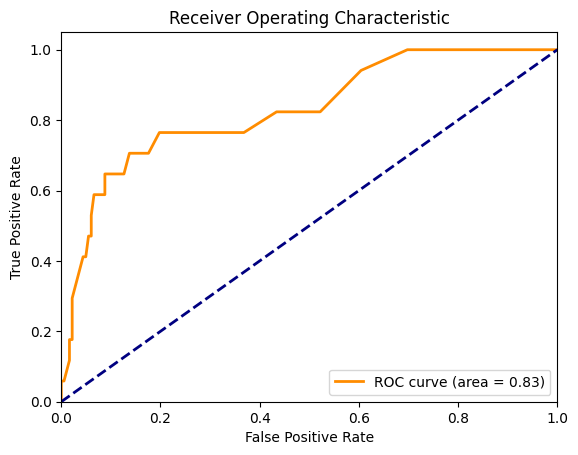

In [ ]:
# FOR THE RANDOM FOREST
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

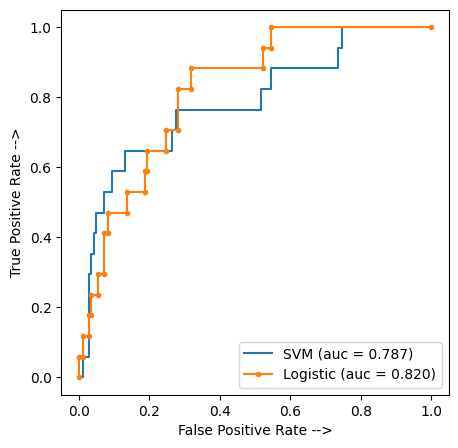

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

